In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#Зададим концы нашего отрезка
a = 2
b = 8

#Число узлов
N = 40
#Число точек
N1 = 50

In [25]:
nodes_grid = np.linspace(a, b, N)
points_grid = np.linspace(a, b, N1)

In [26]:
#Напишем функцию, возвращающую значения функции для данных точек
#принимает массив координат

def func(coordinates):
    return coordinates**2 / (2 + np.sin(coordinates))

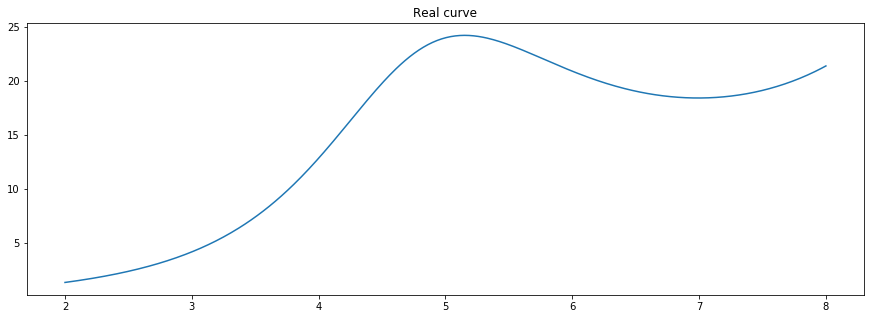

In [27]:
x = np.linspace(a, b, 500)
plt.figure(figsize=(15,5))
plt.plot(x, func(x))
plt.title("Real curve")
plt.show()

In [28]:
#x - узлы, для которых надо посчитать коэффициенты полинома Ньютона
def get_coeff(x):
    n = len(x)
    table = np.zeros((n, n))
    
    #Получим значения функции в данных точках
    y = func(x)
    
    for i in range(0, n):
        table[i][0] = y[i]

    for j in range(1, n):
        for i in range(j, n):
            table[i][j] = (table[i][j - 1] - table[i - 1][j - 1]) / (x[i] - x[i - j])
    
    # Массив коэффициентов
    b = np.zeros(n)
    for i in range(0, n): 
        b[i] = table[i][i]
        
    return b

In [29]:
#x - конкретная точка, для которой сейчас строим полином
def newton_polynom(x, nodes):
    b = get_coeff(nodes)
    #print(len(b))
    #print(len(nodes))
    n = len(nodes)
    #print(range(1, n))
    res = b[0]
    for i in range(1, n):
        prod = b[i]
        for j in range(0, i):
            prod *= (x - nodes[j])
        res += prod
    return res

In [30]:
polynom_newt = np.array([newton_polynom(points_grid[i], nodes_grid) for i in range(0, N1)])

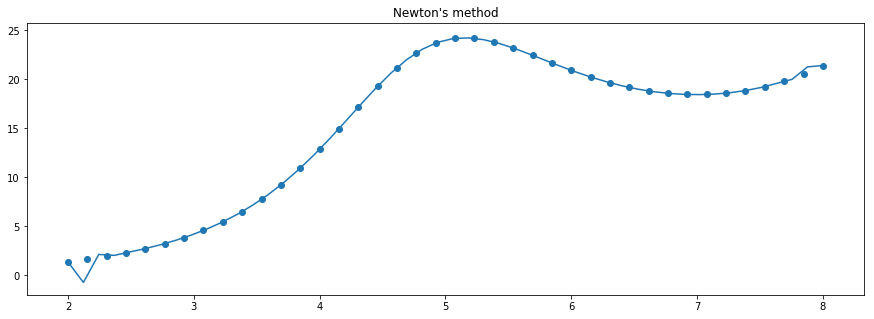

In [31]:
plt.figure(figsize=(15,5))
plt.plot(points_grid, polynom_newt)
plt.scatter(nodes_grid, func(nodes_grid))
plt.title("Newton's method")
plt.show()

In [32]:
# x - точка, для которой считаем полином
def lagrange_polynom(x, nodes):
    # Значения функции в узлах
    y = func(nodes)
    
    n = len(nodes)
    res = 0
    for i in range(0, n):
        prod = y[i]
        for j in range(0, n):
            if (i != j):
                prod *= (x - nodes[j]) / (nodes[i] - nodes[j])
        res += prod
    return res

In [33]:
polynom_lagrange = np.array([lagrange_polynom(points_grid[i], nodes_grid) for i in range(0, N1)])

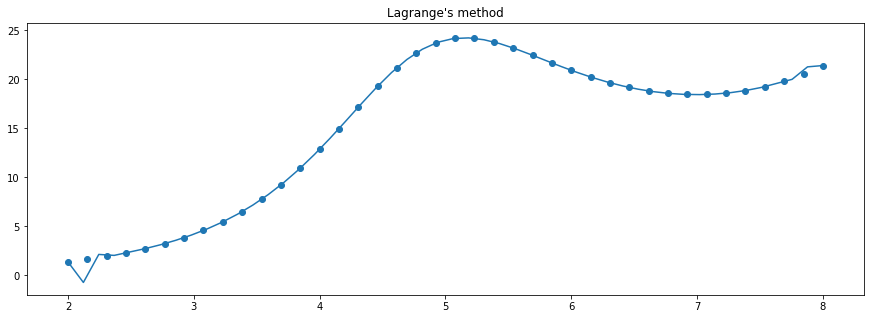

In [34]:
plt.figure(figsize=(15,5))
plt.plot(points_grid, polynom_lagrange)
plt.scatter(nodes_grid, func(nodes_grid))
plt.title("Lagrange's method")
plt.show()

In [35]:
# возвращает узлы Чебышева по 
def get_cheb(a, b, N):
    cheb_grid = []
    for i in range(0, N):
        cheb_grid.append((a + b) / 2 + (b - a) / 2 * np.cos(np.pi/(2 * N) * (2 * i + 1)))
    return np.array(cheb_grid)

In [36]:
cheb_grid = get_cheb(a, b, N)
polynom_cheb_newt = np.array([newton_polynom(points_grid[i], cheb_grid) for i in range(0, N1)])

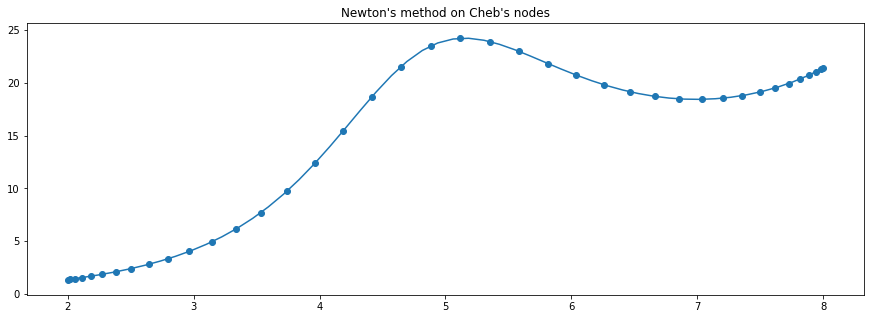

In [37]:
plt.figure(figsize=(15,5))
plt.plot(points_grid, polynom_cheb_newt)
plt.scatter(cheb_grid, func(cheb_grid))
plt.title("Newton's method on Cheb's nodes")
plt.show()

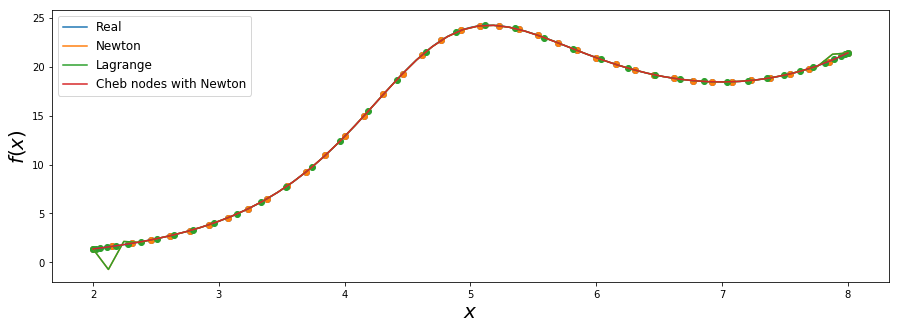

In [38]:
# Построим все три графика на одной картинке

plt.figure(figsize=(15, 5))

x = np.linspace(a, b, 500)
plt.plot(x, func(x), label='Real')

plt.plot(points_grid, polynom_newt, label='Newton')
plt.scatter(nodes_grid, func(nodes_grid))

plt.plot(points_grid, polynom_lagrange, label='Lagrange')
plt.scatter(nodes_grid, func(nodes_grid))

plt.plot(points_grid, polynom_cheb_newt, label='Cheb nodes with Newton')
plt.scatter(cheb_grid, func(cheb_grid))

plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$f(x)$', fontsize=20)
plt.legend(fontsize=12, loc=2)
plt.show()